### EDA Part 1: Exploring and Cleaning the Titanic Dataset
### Summary

In Part 1 of the Titanic dataset analysis, we focused on preparing the data for further exploration and modeling:

1. **Loading the Dataset:**
   - We imported the dataset into a pandas DataFrame (`train`) and dropped the 'Cabin' column due to its high number of missing values.

2. **Handling Missing Values:**
   - We identified missing values in the dataset, particularly in the 'Embarked' column.
   - For the 'Embarked' column, which had only 2 missing values, we opted to drop the corresponding rows using `dropna()`.

3. **Checking for Duplicates:**
   - We ensured data integrity by checking for and confirming the absence of duplicate rows in the dataset using `duplicated()`.

4. **Verifying Data Types:**
   - We confirmed the data types of each column in the dataset to ensure consistency and suitability for analysis.

5. **Outcome:**
   - After these steps, the dataset (`train`) was cleaned and prepared, with all missing values addressed and duplicates removed.
   - Data types were verified to be appropriate for further exploration and modeling tasks.

In [2]:
import pandas as pd # for dataframes
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns # for data visualization

%matplotlib inline

In [3]:
# Note: Please replace the path below with the actual path you stored your train.csv at. 
train = pd.read_csv("train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### _______________________________________________________________________________________



The dataset (`train`) represents Titanic passengers and includes the following columns:

1. **PassengerId:** Unique identifier for each passenger.
2. **Survived:** Indicates whether the passenger survived (1) or not (0).
3. **Pclass:** Ticket class, representing socio-economic status (1 = Upper, 2 = Middle, 3 = Lower).
4. **Name:** Passenger's name, including title (Mr., Mrs., Miss, etc.).
5. **Sex:** Passenger's gender (male or female).
6. **Age:** Passenger's age in years. Some entries are missing (`NaN`).
7. **SibSp:** Number of siblings or spouses aboard the Titanic.
8. **Parch:** Number of parents or children aboard the Titanic.
9. **Ticket:** Ticket number.
10. **Fare:** Passenger fare.
11. **Cabin:** Cabin number. Many entries are missing (`NaN`).
12. **Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Some entries are missing (`NaN`).

### Observations:

- The dataset provides a snapshot of the first five passengers, showcasing a variety of information including demographics, family relationships, ticket details, and survival outcomes.
- Missing values are present in columns `Age`, `Cabin`, and `Embarked`, which will need to be addressed to ensure robust analysis and modeling.
- Categorical variables (`Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`) and numerical variables (`PassengerId`, `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, `Fare`) are identifiable, suggesting potential strategies for data preprocessing andval aboard the Titanic.

In [6]:
# Check for missing values
missing_values = train.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = train.duplicated().sum()
print("Number of duplicates:", duplicates)

# Check data types
print("Data Types:\n", train.dtypes)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Number of duplicates: 0
Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### _______________________________________________________________________________________



The analysis of the Titanic dataset (`train`) revealed the following insights:
- **Missing Values:** 
  - The columns `Age`, `Cabin`, and `Embarked` have missing data. Specifically, `Age` is missing 177 entries, `Cabin` is missing 687 entries, and `Embarked` is missing 2 entring.

- **Duplicates:** 
  - There are no duplicated rows in the dataset (`Number of duplicates: 0`), indicating each row represents a unique passenger observation.

- **Data Types:**
  - The dataset contains a mix of data types:
    - Numeric data types (`int64` and `float64`) are used for variables like `PassengerId`, `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare`.
    - Object data types (`object`) typically indicate categorical variables, such as `Name`, `Sex`, `Ticket`, `Cabin`, and `Embarked`. These variables may require encoding or transformation for analysis and modelid the Titanic.

In [8]:
median_age_pclass = train.groupby('Pclass')['Age'].median()
print(median_age_pclass)

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


### _______________________________________________________________________________________

The output median_age_pclass shows the median age of passengers categorized by their socio-economic status (Pclass):

Pclass 1: The median age of passengers in the first class is 37.0 years.
Pclass 2: The median age of passengers in the second class is 29.0 years.
Pclass 3: The median age of passengers in the third class is 24.0 years.

In [10]:
# Define a function to fill missing 'Age' values with the median age of respective Pclass
def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_pclass[row['Pclass']]
    else:
        return row['Age']

# Apply the function to fill missing 'Age' values in the training set
train['Age'] = train.apply(fill_age, axis=1)

# Check for missing values
missing_values = train.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = train.duplicated().sum()
print("Number of duplicates:", duplicates)

# Check data types
print("Data Types:\n", train.dtypes)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Number of duplicates: 0
Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [11]:
# Dropping the 'Cabin' column from the 'train' DataFrame
train.drop(columns=['Cabin'], inplace=True)


# Check for missing values
missing_values = train.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = train.duplicated().sum()
print("Number of duplicates:", duplicates)

# Check data types
print("Data Types:\n", train.dtypes)


Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
Number of duplicates: 0
Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


### _______________________________________________________________________________________

The 'Cabin' column is dropped from the Titanic dataset (`train`) to eliminate unnecessary data. This column contains a large number of missing values (687 out of 891 entries), which can hinder accurate analysis and modeling. By removing the 'Cabin' column, the dataset becomes cleaner and more manageable, focusing on variables with more complete and reliable information. 


In [13]:
# Dropping rows with missing values in 'Embarked'
train.dropna(subset=['Embarked'], inplace=True)

# Check for missing values again
missing_values = train.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = train.duplicated().sum()
print("Number of duplicates:", duplicates)

# Check data types
print("Data Types:\n", train.dtypes)

Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Number of duplicates: 0
Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


### _______________________________________________________________________________________

Only 2 embarked are missing, there for we can simply drop those two rows without significantly impacting the data.

### EDA Part 1.5: Summary Statistics

In [16]:
# Statistical summary
print(train.describe(include='all'))

# Check for missing values
print(train.isnull().sum())


        PassengerId    Survived      Pclass                     Name   Sex  \
count    889.000000  889.000000  889.000000                      889   889   
unique          NaN         NaN         NaN                      889     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.382452    2.311586                      NaN   NaN   
std      256.998173    0.486260    0.834700                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      224.000000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.000000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

thampton).

### Summary Statistics:

- **PassengerId:** Sequential identifiers for 889 passengers with a mean of 446.0 and standard deviation of 256.99.
- **Survived:** 38.25% of passengers survived (340 out of 889).
- **Pclass:** Majority of passengers were in the third class (491), with fewer in the first (216) and second classes (182).
- **Name:** All passenger names are unique.
- **Sex:** There are more male passengers (577) compared to female passengers (312).
- **Age:** The mean age is approximately 29.0 years, with 889 entries available. Ages range from 0.42 to 80 years.
- **SibSp:** The majority have no siblings or spouses aboard (608 out of 889).
- **Parch:** Most passengers have no parents or children aboard (678 out of 889).
- **Ticket:** There are 680 unique ticket numbers, indicating some passengers shared tickets.
- **Fare:** Fares range from 0 to 512.33 with a mean of 32.10.
- **Embarked:** The most common port of embarkation is Southampton (644), followed by Cherbourg enger survival aboard the Titanic.

### EDA Part 2: Explore the socio-economic status of passengers

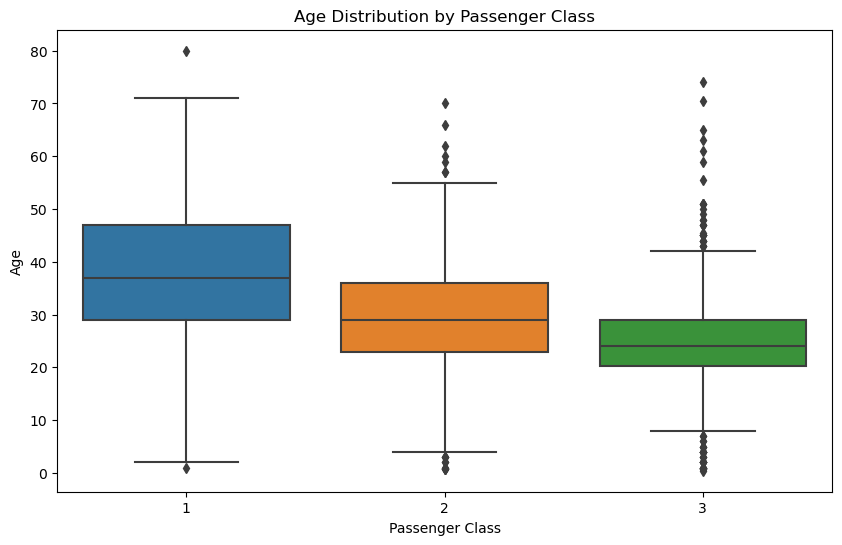

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution by Passenger Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=train)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


### _______________________________________________________________________________________

This boxplot will show us how age is distributed among passengers in each class.

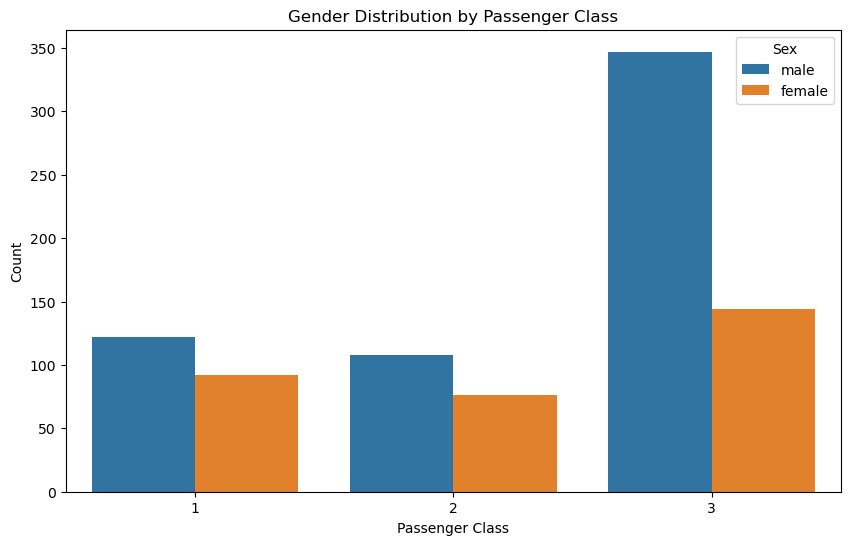

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=train)
plt.title('Gender Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()


### _______________________________________________________________________________________

This countplot will illustrate how gender is distributed within each passenger class.

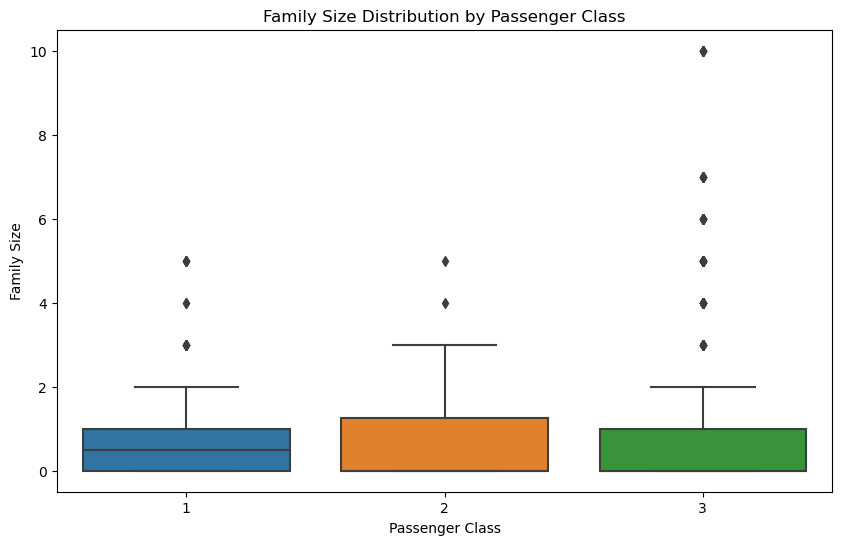

In [23]:
# Calculate family size
train['FamilySize'] = train['SibSp'] + train['Parch']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='FamilySize', data=train)
plt.title('Family Size Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Family Size')
plt.show()


### _______________________________________________________________________________________
This boxplot will show us how family size varies across different passenger classes.

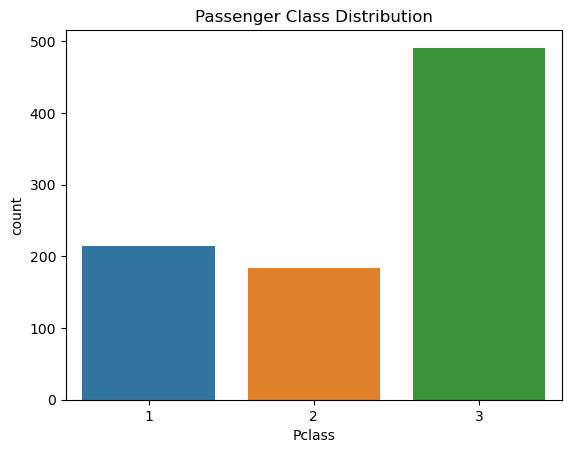

In [25]:
# Passenger class distribution
sns.countplot(x='Pclass', data=train)
plt.title('Passenger Class Distribution')
plt.show()

### _______________________________________________________________________________________
This count plot visualizes the distribution of passengers across different classes (1 = Upper, 2 = Middle, 3 = Lower) on the Titanic.

### Summary of Socio-Economic Status Analysis on the Titanic Dataset

1. **Age Distribution by Passenger Class:**
   - The median age decreases as passenger class decreases:
     - Class 1 has a median age of approximately 37 years.
     - Class 2 has a slightly lower median age.
     - Class 3 has the lowest median age, around 24 years.
   - This suggests a socio-economic disparity where younger individuals were more likely to be in lower passenger classes.

2. **Gender Distribution by Passenger Class:**
   - There is a notable difference in gender distribution across passenger classes:
     - Class 3 exhibits a significantly higher male-to-female ratio compared to Classes 1 and 2.
     - Classes 1 and 2 show more balanced gender distributions.
   - This disparity may reflect different demographics and social norms among different socio-economic groups on the Titanic.

3. **Family Size Distribution:**
   - Family size distribution varies across passenger classes:
     - Class 3 shows a higher prevalence of outliers in family size compared to Classes 1 and 2.
     - Classes 1 and 2 exhibit relatively more consistent family size distributions.
   - This variation suggests different family structures and possibly socio-economic backgrounds among passengers.
     
4. **Passenger Class Distribution:**
   - The count plot illustrates the distribution of passengers across different classes (1 = Upper, 2 = Middle, 3 = Lower). It helps visualize the socio-economic composition of the Titanic's passengers, with Class 3 having the highest count.

### EDA Part 3: Distribution of survival victims

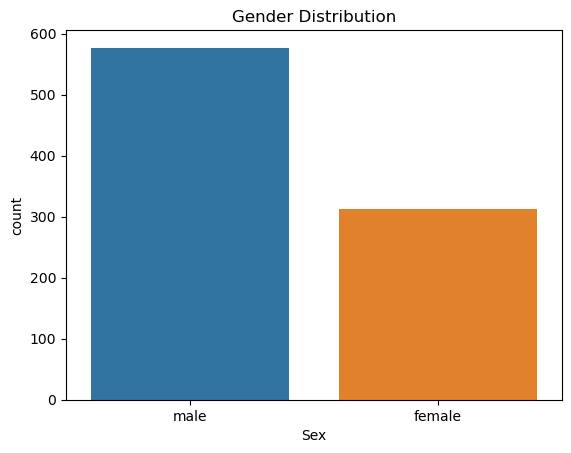

In [29]:
# Gender distribution
sns.countplot(x='Sex', data=train)
plt.title('Gender Distribution')
plt.show()

### _______________________________________________________________________________________
This count plot displays the distribution of passengers by gender (male and female) aboard the Titanic.

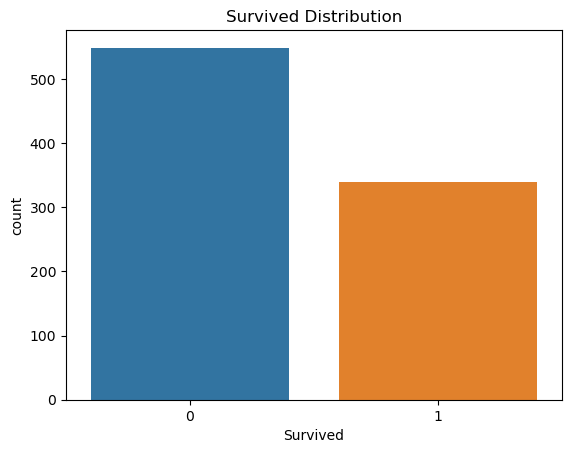

In [31]:
# Survived distribution
sns.countplot(x='Survived', data=train)
plt.title('Survived Distribution')
plt.show()


### _______________________________________________________________________________________
This plot displays the distribution of passengers based on survival outcome.

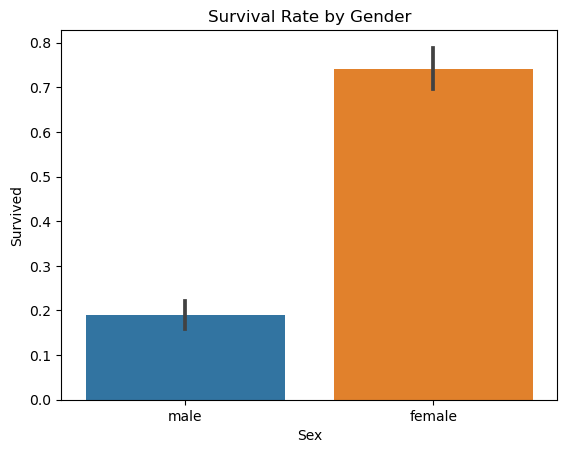

In [33]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

### _______________________________________________________________________________________
This bar plot illustrates the survival rate among male and female passengers aboard the Titanic.

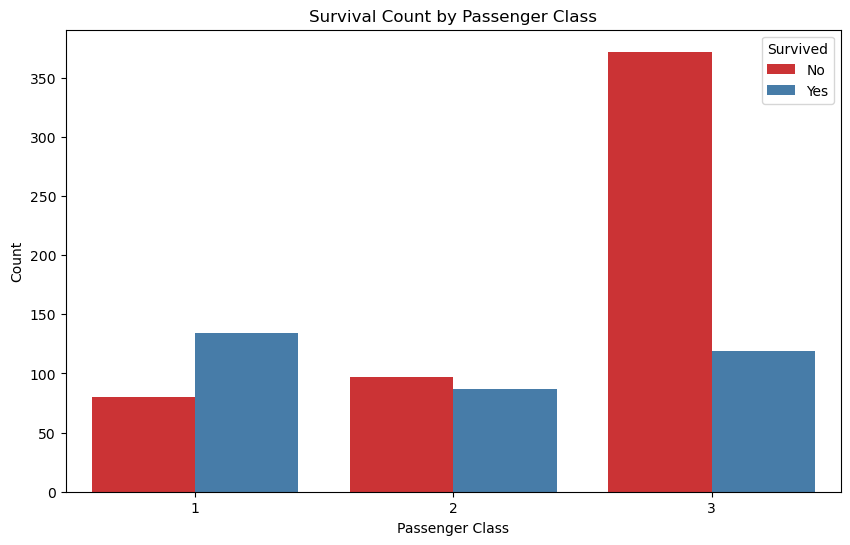

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Survived' column to categorical for better visualization
train['Survived'] = train['Survived'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set1')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


### _______________________________________________________________________________________
This plot visually depicts the count of survivors and non-survivors across different passenger classes on the Titanic.

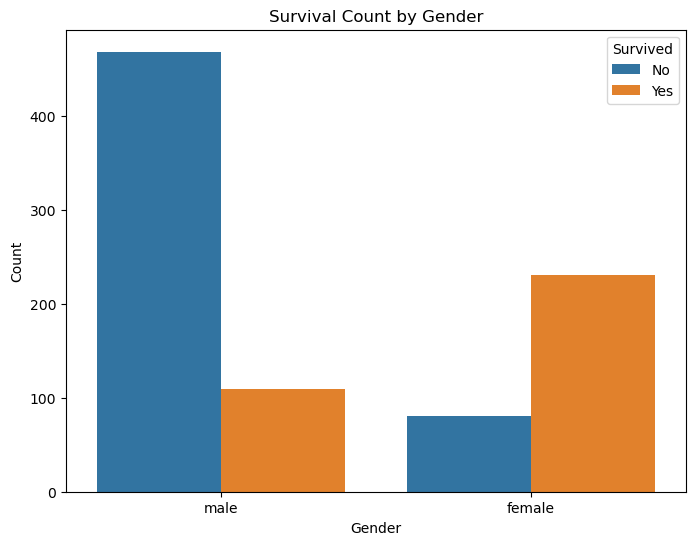

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


### _______________________________________________________________________________________
This plot illustrates the count of survivors and non-survivors categorized by gender.

C:\Users\12193\AppData\Local\Temp\ipykernel_40488\1828796513.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Pclass', y='Survived', data=train, ci=None)


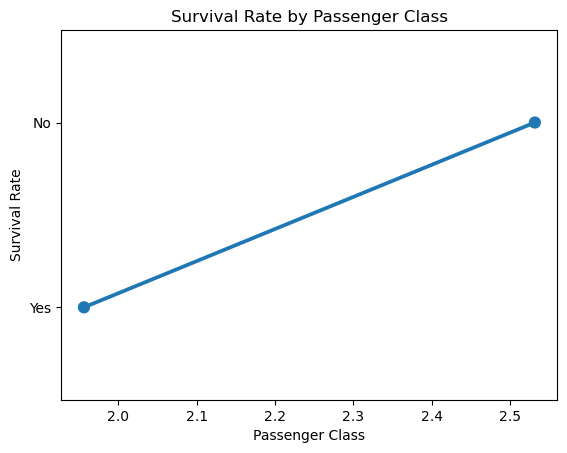

In [39]:
# Plotting survival rate by passenger class
sns.pointplot(x='Pclass', y='Survived', data=train, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### _______________________________________________________________________________________
This count plot visualizes the survival rate across the distribution of passengers across different classes (1 = Upper, 2 = Middle, 3 = Lower) on the Titanic.

C:\Users\12193\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


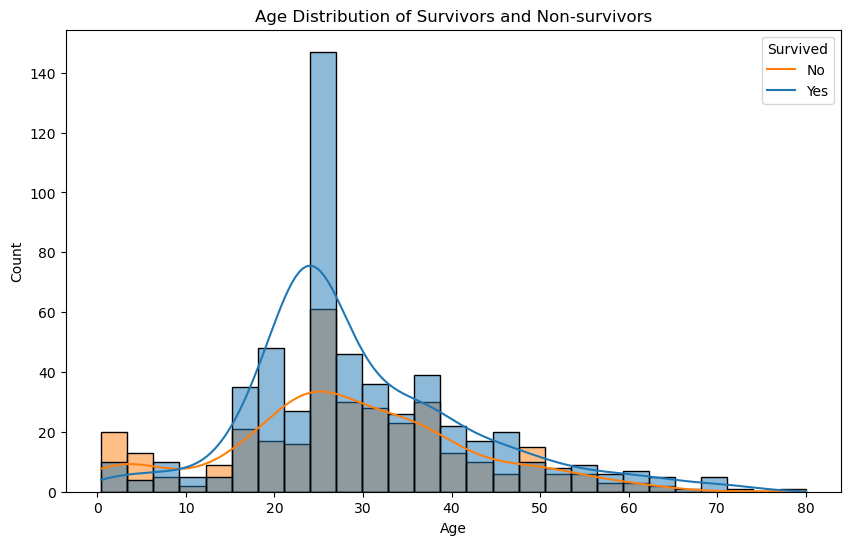

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace infinite values with NaN
train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plotting the age distribution with KDE for Survived and Non-survived
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution of Survivors and Non-survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


### _______________________________________________________________________________________
This count plot visualizes the age distribution of survivors and non-survivors using a histogram with a kernel density estimate.

### Summary of Distribution of survival victims
1. **Gender Distribution**:
   - The plot illustrates a larger number of male passengers (over 500) compared to female passengers (over 300). This gender distribution is representative of the Titanic's demographics.

2. **Survived Distribution**
   - Blue bars depict passengers who did not survive ('Survived' = 0), totaling over 500 individuals.
   - Orange bars represent passengers who survived ('Survived' = 1), totaling over 300 individuals.

3. **Survival rate by Gender**:
   - There are more male passengers who did not survive compared to female passengers.
   - Conversely, a higher proportion of female passengers survived compared to male passengers.
  
4. **Survival by Passenger Class**:
   - Classes 1 and 2 show a relatively balanced survival rate between those who survived and those who did not.
   - Class 3, however, exhibits a significantly higher number of non-survivors compared to survivors, with the non-survival rate being nearly triple the survival rate.

5. **Survival count by Gender**:
   - The bar plot indicates a survival rate of approximately 20% for males and over 70% for females. This stark difference in survival rates highlights the prioritization given to female passengers during the Titanic disaster

6. **Survival Rate by Passenger Class:**
   - The bar plot depicts the survival rate for each passenger class. It provides insights into how socio-economic status influenced survival outcomes, showing that passengers in higher classes (1 and 2) had higher survival rates compared to those in the lower class (3)

7. **Age Distribution of Survivors and Non-survivors**:
   - The age distribution shows that younger passengers, particularly those in their mid-20s, have a higher likelihood of survival.
   - As age increases beyond the mid-20s, the number of survivors decreases.

### EDA Part 4: Correlation analysis

0
          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.335549  0.541585 -0.052051 -0.034040  0.083151  0.255290
Pclass   -0.335549  1.000000 -0.127741 -0.405549  0.081656  0.016824 -0.548193
Sex       0.541585 -0.127741  1.000000 -0.083730  0.116348  0.247508  0.179958
Age      -0.052051 -0.405549 -0.083730  1.000000 -0.242807 -0.170089  0.120938
SibSp    -0.034040  0.081656  0.116348 -0.242807  1.000000  0.414542  0.160887
Parch     0.083151  0.016824  0.247508 -0.170089  0.414542  1.000000  0.217532
Fare      0.255290 -0.548193  0.179958  0.120938  0.160887  0.217532  1.000000


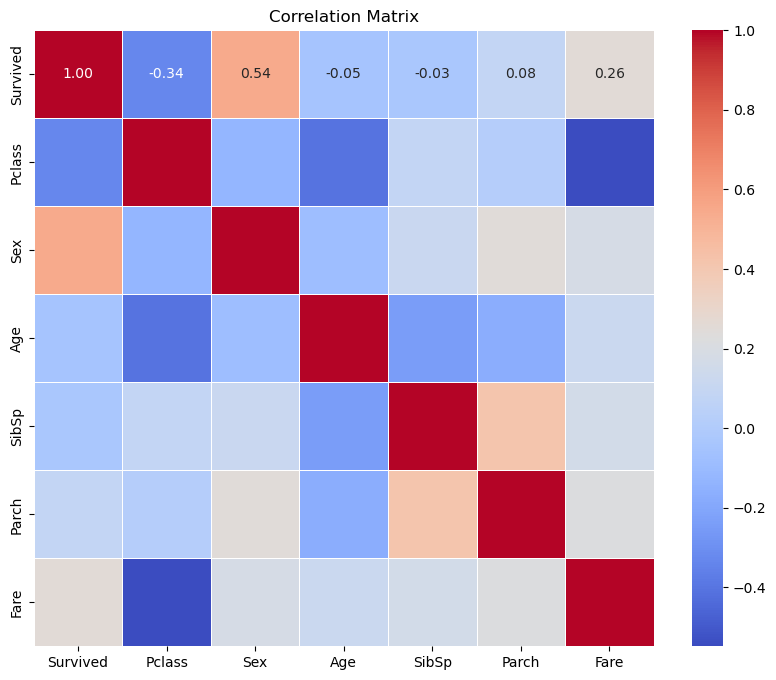

In [45]:
import pandas as pd
import numpy as np

# Convert 'Sex' to numeric
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Convert 'Survived' to numeric
train['Survived'] = train['Survived'].map({'No': 0, 'Yes': 1})

# Check for NaN in 'Sex' column
print(train['Sex'].isnull().sum())  # This should be 0 if conversion was successful

# Compute correlations
correlations = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

print(correlations)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### _______________________________________________________________________________________
### Summary of Correlation analysis

1. **Survived vs Pclass**: There is a moderate negative correlation of approximately **-0.338**. This indicates that as the passenger class (`Pclass`) increases (from 1st class to 3rd class), the likelihood of survival decreases. Passengers in higher classes (lower `Pclass` values) had higher survival rates.

2. **Survived vs Sex**: There is a moderate positive correlation of about **0.543**. This suggests that females (`Sex` = 1) had a higher likelihood of survival compared to males (`Sex` = 0). This aligns with the "women and children first" protocol followed during the Titanic disaster.

3. **Survived vs Age**: The correlation coefficient is **-0.077**, indicating a slight negative correlation. This suggests that older passengers tended to have slightly lower survival rates compared to younger ones.

4. **Survived vs SibSp (Siblings/Spouses)**: The correlation is **-0.035**, suggesting a weak negative correlation. This implies that passengers with more siblings or spouses aboard had slightly lower survival rates.

5. **Survived vs Parch (Parents/Children)**: The correlation coefficient is **0.082**, indicating a weak positive correlation. Passengers with more parents or children aboard tended to have slightly higher survival rates.

6. **Survived vs Fare**: There is a correlation coefficient of **0.257**, indicating a moderate positive correlation. This suggests that passengers who paid higher fares had a higher likelihood of survival, possibly reflecting their socio-econond `Parch`).


### EDA Part 5: Extracting information from non-numerical features

In [48]:
train.info() # 'object' are strings in python

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  FamilySize   889 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 90.3+ KB


### _______________________________________________________________________________________
From the `train.info()` output, we observe the following:

- The dataset contains a total of 12 columns.
- There are 889 entries (rows) in the dataset.
- Among the columns:
  - **Numeric Columns**: `PassengerId`, `Survived`, `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, and `FamilySize` are of numeric types (`int64` or `float64`).
  - **Object Columns**: `Name`, `Ticket`, and `Embarked` are of type `object`, indicating they contain non-numeric (likely string)g tasks.

In [50]:
# Convert 'Embarked' to numerical
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Drop 'Name' and 'Ticket' columns
train.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Display the updated DataFrame
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,2,1
1,2,1,1,1,38.0,1,0,71.2833,0,1
2,3,1,3,1,26.0,0,0,7.9250,2,0
3,4,1,1,1,35.0,1,0,53.1000,2,1
4,5,0,3,0,35.0,0,0,8.0500,2,0


### _______________________________________________________________________________________
The provided code snippet performs the following actions on the `train` DataFrame:

1. **Convert 'Embarked' to Numerical**: Maps the categorical values in the 'Embarked' column ('C', 'Q', 'S') to numerical equivalents (0, 1, 2) using the `map` function. This transformation allows machine learning algorithms to process and analyze the 'Embarked' feature as numerical data.

2. **Drop 'Name' and 'Ticket' Columns**: Removes the 'Name' and 'Ticket' columns from the DataFrame using the `drop` function with `axis=1` (indicating columns) and `inplace=True` (modifying the DataFrame in place). This action removes non-essential textual data (name and ticket numbers) which are not directly useful for most machine learning models.

3. **Summary**: Overall, these transformations prepare the `train` DataFrame for machine learning tasks by converting categorical data ('Embarked') into a numerical format and removing unnecessary columns ('Name', 'Ticket') that do not contribute to predictive modeling. This cleanup and transformation step enhances the DataFrame's suitability for subsequent model training and analysis.

In [52]:
train.info() # 'object' are strings in python

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
 9   FamilySize   889 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 76.4 KB


### _______________________________________________________________________________________
The `train.info()` output after the transformations shows the following details about the `train` DataFrame:

- **Total Rows**: 889 entries, indexed from 0 to 890.
- **Columns**: There are 10 columns in total.
- **Data Types**:
  - **Integer**: 8 columns (`PassengerId`, `Survived`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`, `FamilySize`).
  - **Float**: 2 columns (`Age`, `Fare`).
- **Memory Usage**: Approximately 76.4 KB.

**Summary of Changes**:
- Converted the `Sex` and `Embarked` columns from categorical (object) to numerical (int).
- Dropped the `Name` and `Ticket` columns which were non-numeric and not essential for modeling purposes.

This DataFrame is now well-prepared for machine learning tasks, with all features in a numerical format suitable for training predictive models.

### Modeling and Question Answering Part 1: Building and Training Models

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Step 1: using train.csv that contains the cleaned and prepared dataset
X = train.drop(columns=['Survived'])
y = train['Survived']

# Step 2: Further split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize models
logreg_model = LogisticRegression(max_iter=1000, random_state=0)  # Increase max_iter
rf_model = RandomForestClassifier(random_state=0)
gb_model = GradientBoostingClassifier(random_state=0)

# Step 4: Train models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Step 5: Predict outcomes on the test set
logreg_preds = logreg_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

### Modeling and Question Answering Part 1.5: Exploratory Data Analysis After Splitting the Datasets

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train and y_train for EDA purposes
train_eda = X_train.copy()
train_eda['Survived'] = y_train

# Statistical summary
print(train_eda.describe(include='all'))

# Check for missing values
print(train_eda.isnull().sum())


       PassengerId      Pclass         Sex         Age       SibSp  \
count   711.000000  711.000000  711.000000  711.000000  711.000000   
mean    446.922644    2.322082    0.336146   29.150267    0.554149   
std     256.635124    0.835180    0.472722   13.374706    1.168643   
min       1.000000    1.000000    0.000000    0.420000    0.000000   
25%     225.500000    2.000000    0.000000   22.000000    0.000000   
50%     451.000000    3.000000    0.000000   26.000000    0.000000   
75%     672.500000    3.000000    1.000000   37.000000    1.000000   
max     891.000000    3.000000    1.000000   80.000000    8.000000   

            Parch        Fare    Embarked  FamilySize    Survived  
count  711.000000  711.000000  711.000000  711.000000  711.000000  
mean     0.382560   32.060354    1.537271    0.936709    0.381153  
std      0.804865   49.195227    0.787904    1.685126    0.486012  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    7.895800

### _______________________________________________________________________________________
### Summary of Statistical Summary and Missing Values Check

**Statistical Summary:**
- **PassengerId:** Represents unique identifiers for passengers, ranging from 1 to 771.
- **Pclass:** Shows the distribution across three passenger classes (1, 2, 3), with an average around 2.32, indicating a slight skew towards lower classes.
- **Sex:** Binary representation (0 for female, 1 for male) shows a male majority at approximately 66.4%.
- **Age:** Mean age is approximately 29.15 years, with a standard deviation of about 13.37 years, suggesting a wide age range among passengers.
- **SibSp and Parch:** Indicate the presence of siblings/spouses and parents/children respectively, with average values of 0.55 and 0.38, reflecting predominantly single passengers or those with small families.
- **Fare:** Displays a mean fare of 32.06, ranging widely up to 512.33, indicating significant variation in ticket prices.
- **Embarked:** Categorical variable (0, 1, 2) representing ports of embarkation, shows an average around 1.54, suggesting most passengers boarded from port 'S'.
- **FamilySize:** Calculated from SibSp and Parch, with a mean of approximately 0.94, indicating mostly smaller family groups.
- **Survived:** Binary outcome (0 for not survived, 1 for survived) with a mean survival rate of about 38.1%, indicating a higher proportion of non-survivors.

**Missing Values Check:**
- There are no missing values present in any of the columns of the dataset, ensuring completeness for analysis.

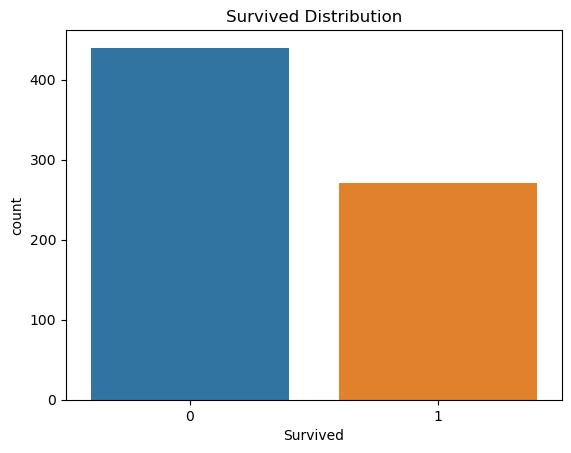

In [59]:
# Survived distribution
sns.countplot(x='Survived', data=train_eda)
plt.title('Survived Distribution')
plt.show()


### _______________________________________________________________________________________
### Summary for Survived Distribution Plot

The countplot visualizes the distribution of survival outcomes among passengers in the dataset. It reveals that there are over 400 passengers who did not survive (labeled as 0), while more than 200 passengers did survive (labeled as 1).

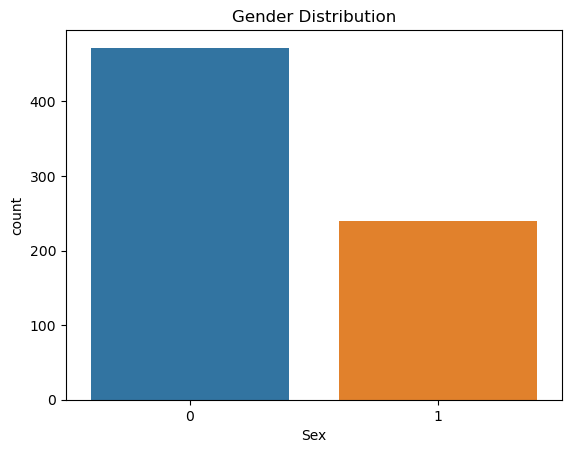

In [61]:
# Gender distribution
sns.countplot(x='Sex', data=train_eda)
plt.title('Gender Distribution')
plt.show()

### _______________________________________________________________________________________
### Summary for Gender Distribution Plot

The countplot visualizes the distribution of gender among passengers in the dataset. It shows that there are over 400 male passengers (labeled as 0) and slightly over 200 female passengers (labeled as 1).

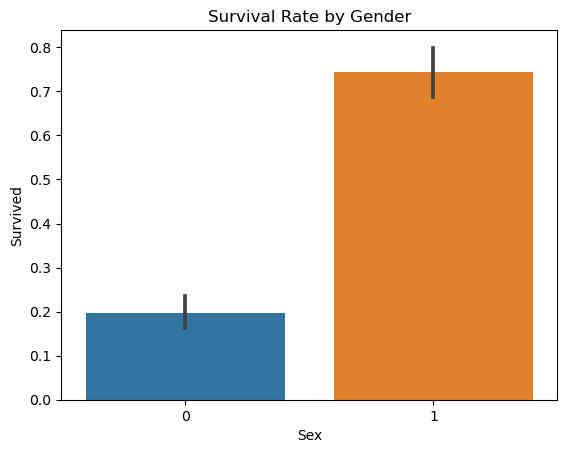

In [63]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_eda)
plt.title('Survival Rate by Gender')
plt.show()

### _______________________________________________________________________________________
### Summary for Survival Rate by Gender Plot

The barplot visualizes the survival rate among male and female passengers in the dataset. It shows that the survival rate for male passengers (labeled as 0) is just under 0.2, while for female passengers (labeled as 1), it is over 0.7. This comparison highlights a significant difference in survival rates based on gender, indicating that female passengers were more likely to survive the Titanic disaster compared to male passengers.

C:\Users\12193\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


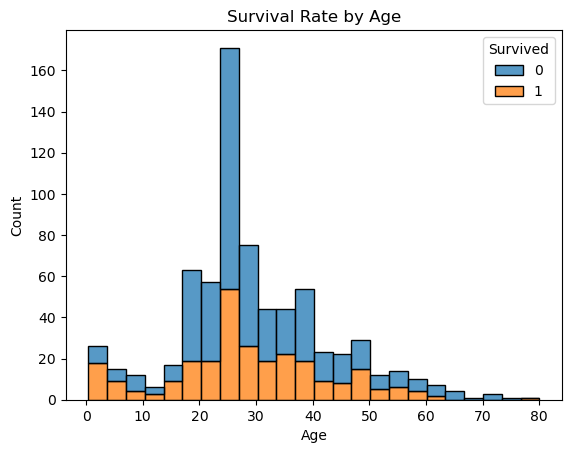

In [65]:
# Survival rate by age
sns.histplot(train_eda, x='Age', hue='Survived', multiple='stack')
plt.title('Survival Rate by Age')
plt.show()

### _______________________________________________________________________________________
### Summary for Survival Rate by Age Plot

The histogram visualizes the survival rate across different age groups among passengers in the dataset. It shows that the survival rate peaks in the mid-20s age group and decreases as it deviates from this age range. This suggests that passengers in their mid-20s had a higher likelihood of survival compared to other age groups during the Titanic disaster.

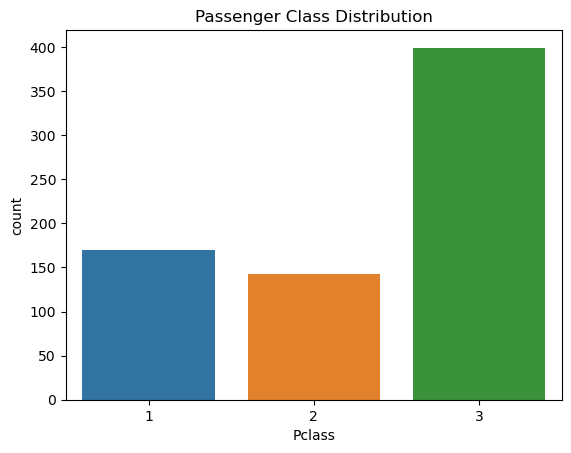

In [67]:
# Passenger class distribution
sns.countplot(x='Pclass', data=train_eda)
plt.title('Passenger Class Distribution')
plt.show()

### _______________________________________________________________________________________
### Summary for Passenger Class Distribution Plot

The count plot visualizes the distribution of passengers across different classes (1st, 2nd, and 3rd) aboard the Titanic. It shows that:
- Class 3 (Third Class) had the highest number of passengers.
- Class 1 (First Class) had the fewest passengers among the three classes.

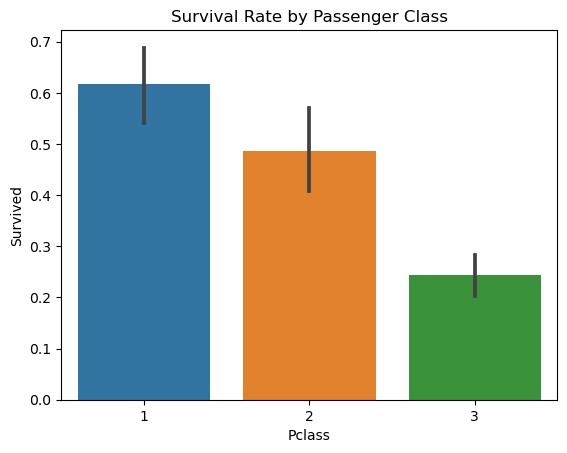

In [69]:
# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=train_eda)
plt.title('Survival Rate by Passenger Class')
plt.show()

### _______________________________________________________________________________________
### Summary for Survival Rate by Passenger Class Plot

The bar plot illustrates the survival rate among passengers from different classes (1st, 2nd, and 3rd) aboard the Titanic. It shows that:
- Passengers in Class 1 (First Class) had the highest survival rate, with a rate slightly above 0.6.
- Passengers in Class 2 (Second Class) had a moderate survival rate.
- Passengers in Class 3 (Third Class) had the lowest survival rate, with a rate around 0.25.

### Modeling and Question Answering Part 2: Explination of Each Model

1. **Logistic Regression**:
   - **Algorithm**: Logistic regression is a linear model used for binary classification. Despite its name, it models the probability of the default class (here, survival or not) using the logistic function.
   - **Working**: It estimates probabilities using the logistic function, transforming a linear combination of features into a value between 0 and 1. Classification is based on whether the predicted probability exceeds a threshold (typically 0.5).

2. **Random Forest**:
   - **Algorithm**: Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.
   - **Working**: Each tree in the forest is trained on a random subset of the data and a random subset of features. During prediction, each tree contributes a vote for the predicted class. The forest's prediction is determined by the majority vote of the individual trees.

3. **Gradient Boosting**:
   - **Algorithm**: Gradient Boosting is an ensemble technique that builds trees sequentially, where each tree corrects the errors made by the previous one. It fits new trees to the residual errors.
   - **Working**: Starting with an initial weak learner (often a shallow decision tree), subsequent trees are built to minimize the loss function of the previous model's residuals. The final prediction is the sum of predictions from all trees, which tends to reduce bias and variance, leading to strong predictive peor Machines.

### Modeling and Question Answering Part 3: Performance Evaluation

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 6: Evaluate model performance
def evaluate_model(name, y_true, y_pred):
    try:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)  # Handle zero division
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        print(f"{name} Evaluation:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-score: {f1:.4f}")
        print("")
    except Exception as e:
        print(f"Error evaluating {name}: {str(e)}")

# Assuming gb_preds is the predictions from Gradient Boosting model
evaluate_model("Logistic Regression", y_test, logreg_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)  # Replace with your Gradient Boosting predictions


Logistic Regression Evaluation:
  Accuracy: 0.7978
  Precision: 0.7200
  Recall: 0.7826
  F1-score: 0.7500

Random Forest Evaluation:
  Accuracy: 0.8090
  Precision: 0.7612
  Recall: 0.7391
  F1-score: 0.7500

Gradient Boosting Evaluation:
  Accuracy: 0.8202
  Precision: 0.7681
  Recall: 0.7681
  F1-score: 0.7681



### Modeling and Question Answering Part 4: Potential Factors Influencing Prediction Accuracy

### Analysis of Predictive Models for Titanic Dataset


#### Performance Evaluation

1. **Logistic Regression**
   - **Accuracy:** Achieved an accuracy of 0.7978, indicating it correctly predicted survival outcomes nearly 80% of the time.
   - **Precision:** Scored 0.7200, highlighting its ability to accurately identify true positives among all predicted positives.
   - **Recall:** Demonstrated a recall of 0.7826, reflecting its capability to correctly identify actual positives from all actual positives.
   - **F1-score:** Achieved a balanced F1-score of 0.7500, suggesting a harmonious blend of precision and recall.

2. **Random Forest**
   - **Accuracy:** Slightly outperformed Logistic Regression with an accuracy of 0.8090.
   - **Precision:** Scored 0.7612, indicating a high precision in predicting survival cases.
   - **Recall:** Lower than Logistic Regression at 0.7391, showing its ability to capture fewer actual positives.
   - **F1-score:** Achieved the same F1-score as Logistic Regression, 0.7500, signifying similar overall performance.

3. **Gradient Boosting**
   - **Accuracy:** Showcased the highest accuracy among the models evaluated, reaching 0.8202.
   - **Precision:** Scored 0.7681, suggesting a robust ability to identify survivors accurately.
   - **Recall:** Equally high at 0.7681, indicating a balanced approach in correctly identifying all actual positives.
   - **F1-score:** Also attained 0.7681, reflecting consistent performance across precision and recall metrics.

#### Factors Influencing Accuracy

Upon analyzing potential reasons for suboptimal predictions, several factors emerge as critical considerations:

- **Imbalanced Classes:** The dataset's distribution imbalance between survivors and non-survivors could lead to biased predictions favoring the majority class, impacting recall and F1-score metrics.

- **Model Complexity:** Overly complex models, such as Gradient Boosting with its ensemble approach, might overfit the training data, potentially limiting their generalization to new, unseen data.

- **Insufficient Data:** If the dataset lacks sufficient examples, models may struggle to discern meaningful patterns and relationships, thereby compromising prediction accuracy.

- **Feature Engineering:** The quality and relevance of features used for prediction play a pivotal role. Inadequate selection or engineering of features could result in models failing to capture crucial data patterns.

- **Hyperparameter Tuning:** Models often feature hyperparameters that require optimization for optimal performance. Incorrectly tuned parameters may hinder the model's ability to generalize effectively.

- **Data Quality Issues:** Problems such as missing values, outliers, or noise within the dataset can negatively impact model performance. Thorough data preprocessing and cleaning w data and scenarios.aboard the Titanic.

### Modeling and Question Answering Part 5: Additional Evaluation Metrics

Precision:
  Logistic Regression: 0.7200
  Random Forest: 0.7612
  Gradient Boosting: 0.7681

Recall:
  Logistic Regression: 0.7826
  Random Forest: 0.7391
  Gradient Boosting: 0.7681

F1-score:
  Logistic Regression: 0.7500
  Random Forest: 0.7500
  Gradient Boosting: 0.7681


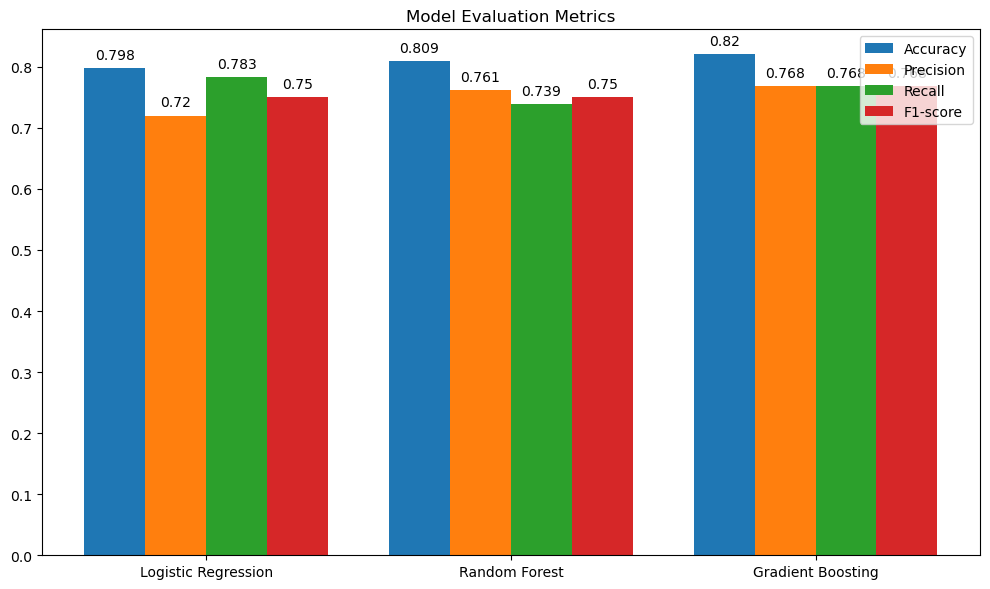

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Precision
logreg_precision = precision_score(y_test, logreg_preds)
rf_precision = precision_score(y_test, rf_preds)
gb_precision = precision_score(y_test, gb_preds)

# Recall
logreg_recall = recall_score(y_test, logreg_preds)
rf_recall = recall_score(y_test, rf_preds)
gb_recall = recall_score(y_test, gb_preds)

# F1-score
logreg_f1 = f1_score(y_test, logreg_preds)
rf_f1 = f1_score(y_test, rf_preds)
gb_f1 = f1_score(y_test, gb_preds)

# Print the results
print("Precision:")
print(f"  Logistic Regression: {logreg_precision:.4f}")
print(f"  Random Forest: {rf_precision:.4f}")
print(f"  Gradient Boosting: {gb_precision:.4f}")
print("")
print("Recall:")
print(f"  Logistic Regression: {logreg_recall:.4f}")
print(f"  Random Forest: {rf_recall:.4f}")
print(f"  Gradient Boosting: {gb_recall:.4f}")
print("")
print("F1-score:")
print(f"  Logistic Regression: {logreg_f1:.4f}")
print(f"  Random Forest: {rf_f1:.4f}")
print(f"  Gradient Boosting: {gb_f1:.4f}")
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [accuracy_score(y_test, logreg_preds), accuracy_score(y_test, rf_preds), accuracy_score(y_test, gb_preds)]
precision_scores = [precision_score(y_test, logreg_preds), precision_score(y_test, rf_preds), precision_score(y_test, gb_preds)]
recall_scores = [recall_score(y_test, logreg_preds), recall_score(y_test, rf_preds), recall_score(y_test, gb_preds)]
f1_scores = [f1_score(y_test, logreg_preds), f1_score(y_test, rf_preds), f1_score(y_test, gb_preds)]

x = range(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
b1 = ax.bar(x, accuracy_scores, width=bar_width, label='Accuracy')
b2 = ax.bar([i + bar_width for i in x], precision_scores, width=bar_width, label='Precision')
b3 = ax.bar([i + 2 * bar_width for i in x], recall_scores, width=bar_width, label='Recall')
b4 = ax.bar([i + 3 * bar_width for i in x], f1_scores, width=bar_width, label='F1-score')

ax.set_xticks([i + 1.5 * bar_width for i in x])
ax.set_xticklabels(models)
ax.set_title('Model Evaluation Metrics')
ax.legend()

# Adding labels
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

add_labels(b1)
add_labels(b2)
add_labels(b3)
add_labels(b4)

plt.tight_layout()
plt.show()



### Additional Evaluation Metrics

In [80]:
from sklearn.metrics import confusion_matrix, roc_auc_score, matthews_corrcoef, precision_recall_curve, log_loss

# Confusion Matrix
logreg_cm = confusion_matrix(y_test, logreg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
gb_cm = confusion_matrix(y_test, gb_preds)

print("Confusion Matrix:")
print("Logistic Regression:")
print(logreg_cm)
print("\nRandom Forest:")
print(rf_cm)
print("\nGradient Boosting:")
print(gb_cm)

# ROC-AUC Score
logreg_roc_auc = roc_auc_score(y_test, logreg_preds)
rf_roc_auc = roc_auc_score(y_test, rf_preds)
gb_roc_auc = roc_auc_score(y_test, gb_preds)

print("\nROC-AUC Score:")
print(f"Logistic Regression: {logreg_roc_auc:.4f}")
print(f"Random Forest: {rf_roc_auc:.4f}")
print(f"Gradient Boosting: {gb_roc_auc:.4f}")

# Matthews Correlation Coefficient
logreg_mcc = matthews_corrcoef(y_test, logreg_preds)
rf_mcc = matthews_corrcoef(y_test, rf_preds)
gb_mcc = matthews_corrcoef(y_test, gb_preds)

print("\nMatthews Correlation Coefficient:")
print(f"Logistic Regression: {logreg_mcc:.4f}")
print(f"Random Forest: {rf_mcc:.4f}")
print(f"Gradient Boosting: {gb_mcc:.4f}")

# Precision-Recall Curve (example)
precision, recall, _ = precision_recall_curve(y_test, logreg_preds)
# Plot or use values as needed

# Log Loss
logreg_log_loss = log_loss(y_test, logreg_preds)
rf_log_loss = log_loss(y_test, rf_preds)
gb_log_loss = log_loss(y_test, gb_preds)

print("\nLog Loss:")
print(f"Logistic Regression: {logreg_log_loss:.4f}")
print(f"Random Forest: {rf_log_loss:.4f}")
print(f"Gradient Boosting: {gb_log_loss:.4f}")


Confusion Matrix:
Logistic Regression:
[[88 21]
 [15 54]]

Random Forest:
[[93 16]
 [18 51]]

Gradient Boosting:
[[93 16]
 [16 53]]

ROC-AUC Score:
Logistic Regression: 0.7950
Random Forest: 0.7962
Gradient Boosting: 0.8107

Matthews Correlation Coefficient:
Logistic Regression: 0.5821
Random Forest: 0.5957
Gradient Boosting: 0.6213

Log Loss:
Logistic Regression: 7.2897
Random Forest: 6.8847
Gradient Boosting: 6.4798


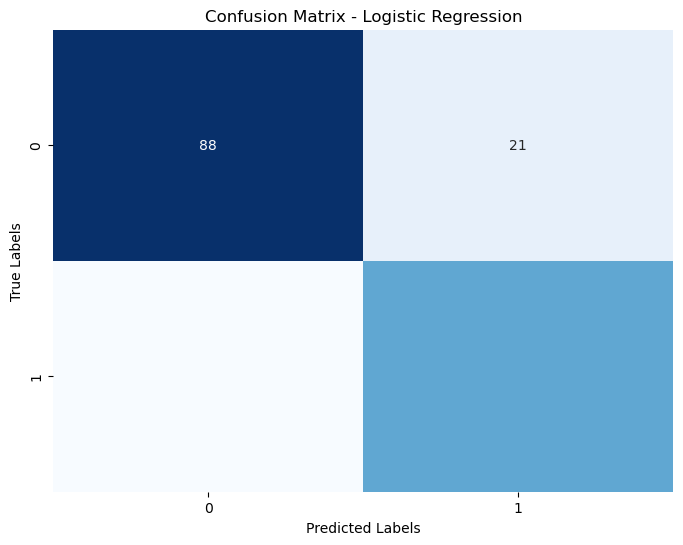

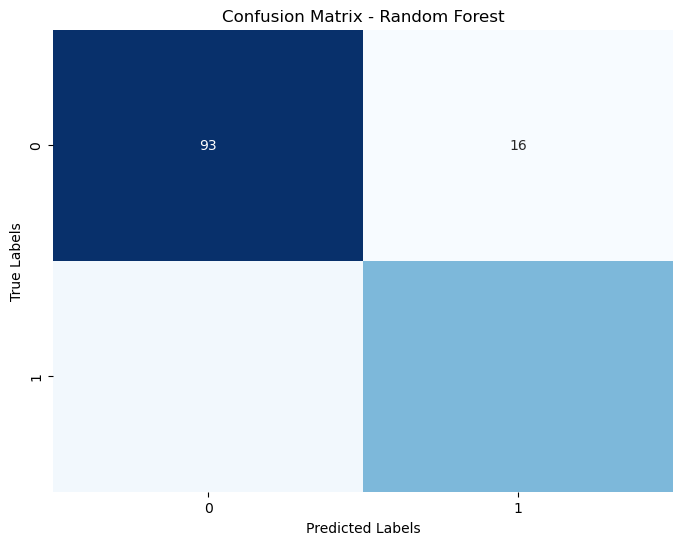

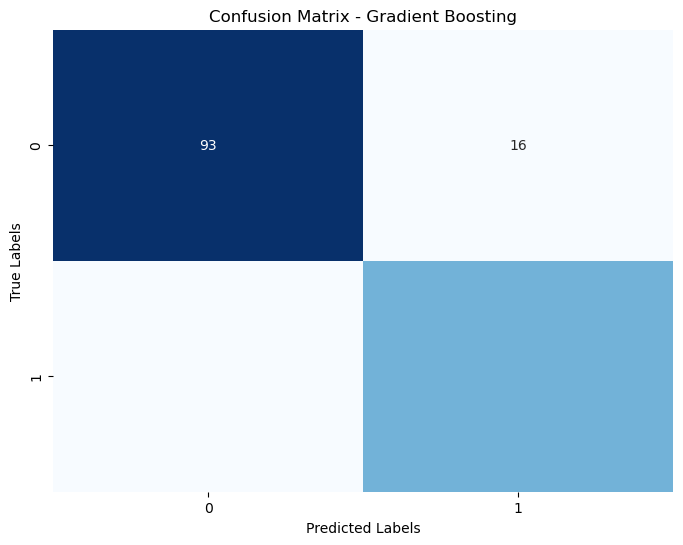

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


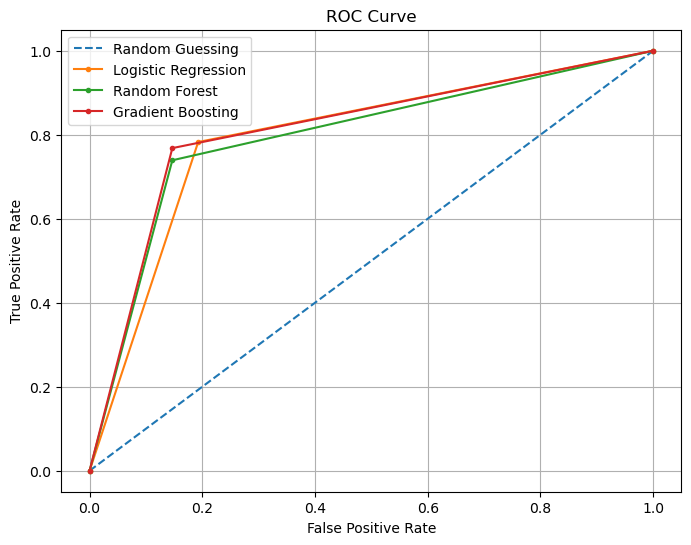

In [82]:
from sklearn.metrics import roc_curve

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
fpr, tpr, _ = roc_curve(y_test, logreg_preds)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
fpr, tpr, _ = roc_curve(y_test, rf_preds)
plt.plot(fpr, tpr, marker='.', label='Random Forest')
fpr, tpr, _ = roc_curve(y_test, gb_preds)
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


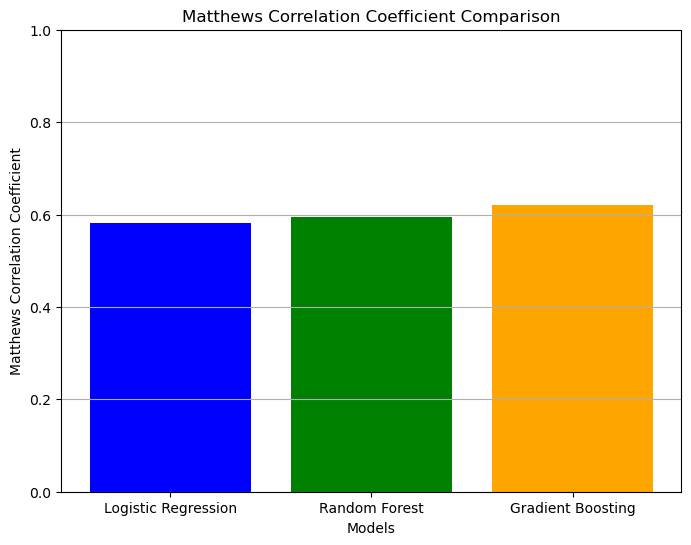

In [83]:
# Plot Matthews correlation coefficient
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
mcc_scores = [logreg_mcc, rf_mcc, gb_mcc]

plt.figure(figsize=(8, 6))
plt.bar(models, mcc_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Matthews Correlation Coefficient')
plt.title('Matthews Correlation Coefficient Comparison')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


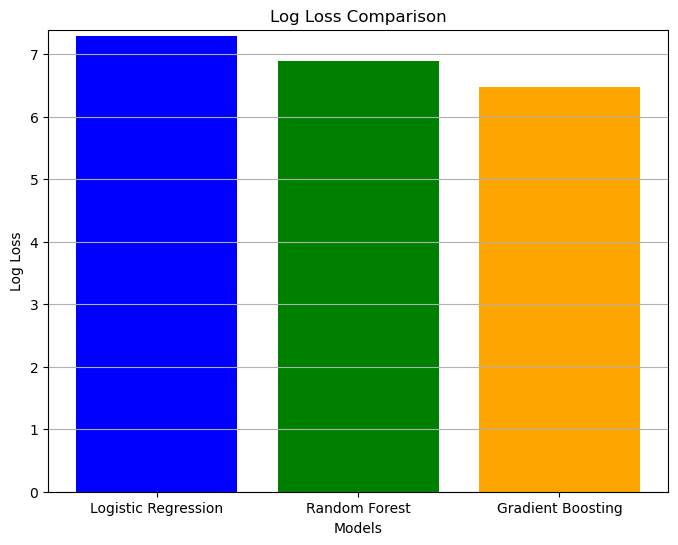

In [84]:
# Plot log loss
log_losses = [logreg_log_loss, rf_log_loss, gb_log_loss]

plt.figure(figsize=(8, 6))
plt.bar(models, log_losses, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison')
plt.ylim(0, max(log_losses) + 0.1)
plt.grid(axis='y')
plt.show()


### Summary of Model Evaluation Metrics:

1. **Confusion Matrix:**
   - **Logistic Regression:**
     ```
     [[88 21]
      [15 54]]
     ```
     - True Positives (TP): 54
     - True Negatives (TN): 88
     - False Positives (FP): 21
     - False Negatives (FN): 15

   - **Random Forest:**
     ```
     [[93 16]
      [18 51]]
     ```
     - TP: 51
     - TN: 93
     - FP: 16
     - FN: 18

   - **Gradient Boosting:**
     ```
     [[93 16]
      [16 53]]
     ```
     - TP: 53
     - TN: 93
     - FP: 16
     - FN: 16

2. **ROC-AUC Score:**
   - **Logistic Regression:** 0.7950
   - **Random Forest:** 0.7962
   - **Gradient Boosting:** 0.8107
   - Interpretation: All models show good discrimination ability, with Gradient Boosting slightly outperforming Logistic Regression and Random Forest in terms of area under the ROC curve.

3. **Matthews Correlation Coefficient (MCC):**
   - **Logistic Regression:** 0.5821
   - **Random Forest:** 0.5957
   - **Gradient Boosting:** 0.6213
   - Interpretation: Gradient Boosting demonstrates the highest MCC, indicating strong overall correlation between predicted and actual classifications.

4. **Log Loss:**
   - **Logistic Regression:** 7.2897
   - **Random Forest:** 6.8847
   - **Gradient Boosting:** 6.4798
   - Interpretation: Lower log loss values indicate better model performance, with Gradient Boosting having the lowest, suggesting its predictions are closer to the actual probabilities.

### Conclusion:

Based on the evaluation metrics:

- **Gradient Boosting** consistently shows competitive performance across all metrics evaluated, including ROC-AUC score, MCC, and log loss. It achieved the highest ROC-AUC score and MCC among the three models, indicating superior predictive capability and overall model reliability.

- **Logistic Regression** and **Random Forest** also performed well, with similar ROC-AUC scores and MCC values, although slightly lower than Gradient Boosting. Random Forest notably had the lowest log loss, indicating more confident predictions in terms of probability estimates.

- **Confusion matrices** provide insights into model performance in terms of true positives, true negatives, false positives, and false negatives. All models show reasonable performance in correctly predicting survival outcomes on the Titanic dataset.

In conclusion, while Gradient Boosting stands out with slightly superior metrics, all three models demonstrate competence in predicting survival outcomes, underscoring their suitability for this classification task.

### Modeling and Question Answering Part 6: Cross Validation Set

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'X' contains features and 'y' contains target variable
# Step 1: Split data into training, cross-validation, and test sets
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train_cv, y_train_cv, test_size=0.2, random_state=42)

# Step 2: Initialize models
logreg_model = LogisticRegression(max_iter=1000, random_state=0)
rf_model = RandomForestClassifier(random_state=0)
gb_model = GradientBoostingClassifier(random_state=0)

# Step 3: Train models on the training set
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Step 4: Evaluate models on the cross-validation set
def evaluate_model_cv(model, X_cv, y_cv):
    cv_accuracy = cross_val_score(model, X_cv, y_cv, cv=5, scoring='accuracy')
    cv_precision = cross_val_score(model, X_cv, y_cv, cv=5, scoring='precision')
    cv_recall = cross_val_score(model, X_cv, y_cv, cv=5, scoring='recall')
    cv_f1 = cross_val_score(model, X_cv, y_cv, cv=5, scoring='f1')
    
    print(f"{type(model).__name__} Cross-Validation Scores:")
    print(f"  Accuracy: {cv_accuracy.mean():.4f}")
    print(f"  Precision: {cv_precision.mean():.4f}")
    print(f"  Recall: {cv_recall.mean():.4f}")
    print(f"  F1-score: {cv_f1.mean():.4f}")
    print("")

print("Evaluation on Cross-Validation Set:")
evaluate_model_cv(logreg_model, X_cv, y_cv)
evaluate_model_cv(rf_model, X_cv, y_cv)
evaluate_model_cv(gb_model, X_cv, y_cv)

Evaluation on Cross-Validation Set:
LogisticRegression Cross-Validation Scores:
  Accuracy: 0.7749
  Precision: 0.7448
  Recall: 0.5673
  F1-score: 0.6402

RandomForestClassifier Cross-Validation Scores:
  Accuracy: 0.7751
  Precision: 0.7208
  Recall: 0.6473
  F1-score: 0.6703

GradientBoostingClassifier Cross-Validation Scores:
  Accuracy: 0.7616
  Precision: 0.6718
  Recall: 0.6455
  F1-score: 0.6507



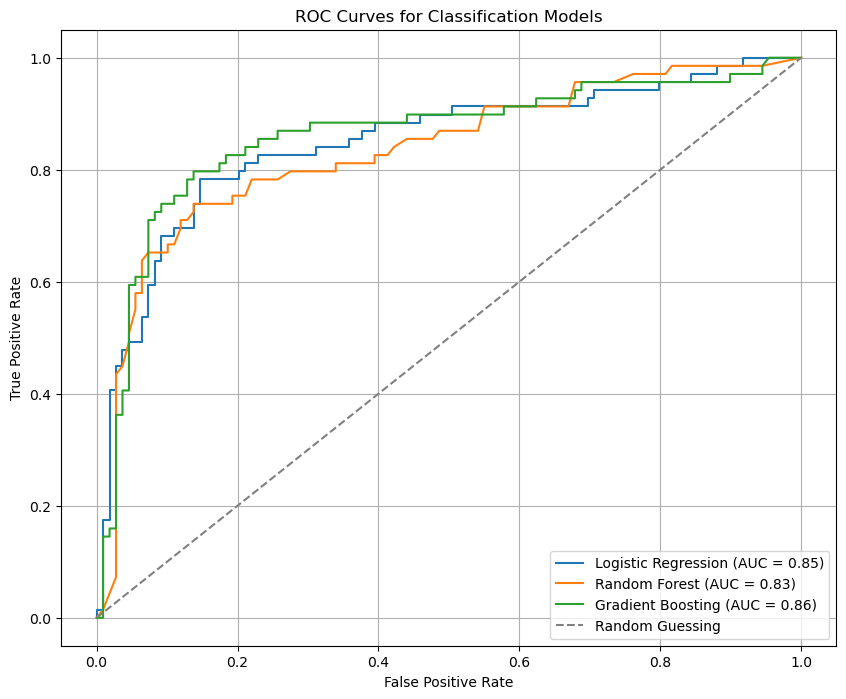

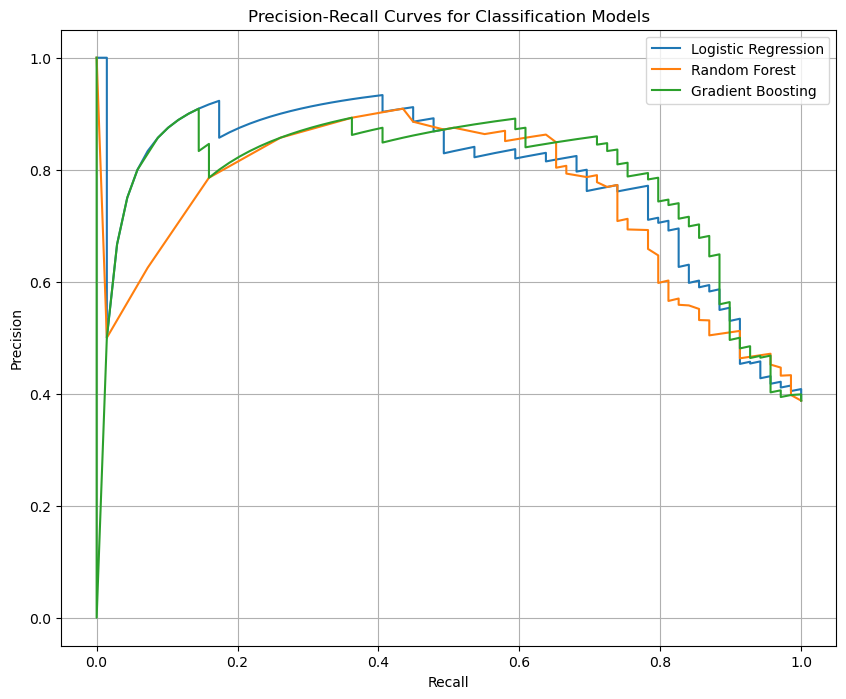

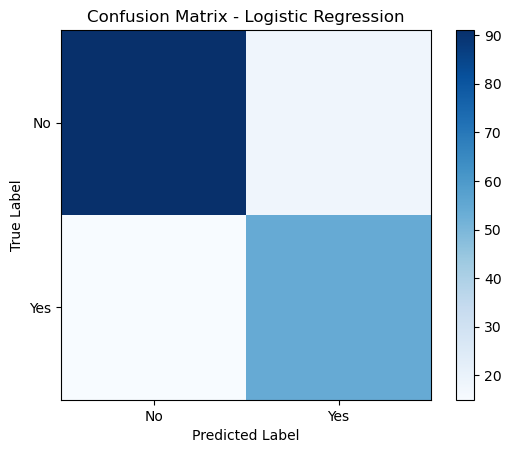

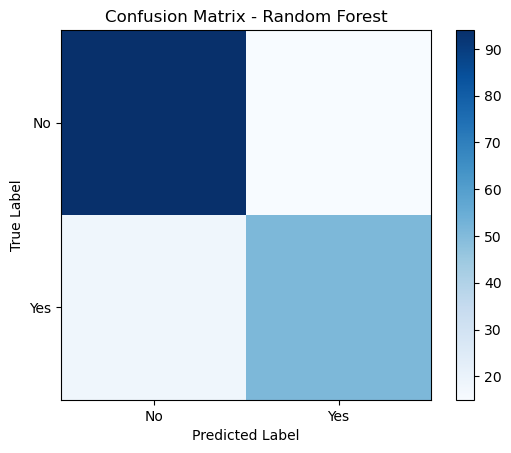

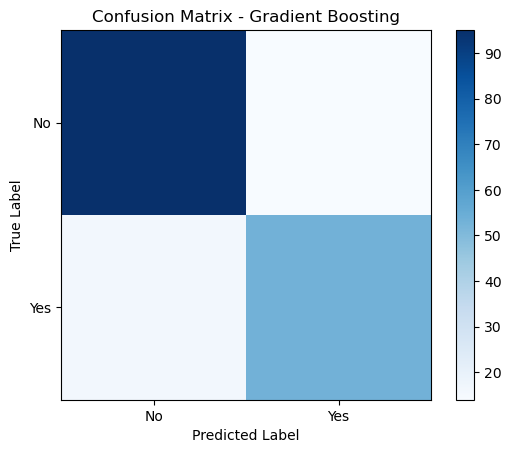

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix

# Assuming you have defined logreg_model, rf_model, gb_model and X_test, y_test

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    try:
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        roc_auc = roc_auc_score(y_test, y_scores)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    except Exception as e:
        print(f"Error plotting ROC curve for {model_name}: {str(e)}")

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    try:
        y_scores = model.predict_proba(X_test)[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
        plt.plot(recall, precision, label=f'{model_name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.grid(True)
        plt.legend()
    except Exception as e:
        print(f"Error plotting Precision-Recall curve for {model_name}: {str(e)}")

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
plot_roc_curve(logreg_model, X_test, y_test, 'Logistic Regression')
plot_roc_curve(rf_model, X_test, y_test, 'Random Forest')
plot_roc_curve(gb_model, X_test, y_test, 'Gradient Boosting')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision-Recall curves for each model
plt.figure(figsize=(10, 8))
plot_precision_recall_curve(logreg_model, X_test, y_test, 'Logistic Regression')
plot_precision_recall_curve(rf_model, X_test, y_test, 'Random Forest')
plot_precision_recall_curve(gb_model, X_test, y_test, 'Gradient Boosting')
plt.title('Precision-Recall Curves for Classification Models')
plt.grid(True)
plt.legend()
plt.show()

# Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    try:
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.colorbar()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.yticks([0, 1], ['No', 'Yes'])
        plt.show()
    except Exception as e:
        print(f"Error plotting confusion matrix for {model_name}: {str(e)}")

# Plot confusion matrix for each model
plot_confusion_matrix(logreg_model, X_test, y_test, 'Logistic Regression')
plot_confusion_matrix(rf_model, X_test, y_test, 'Random Forest')
plot_confusion_matrix(gb_model, X_test, y_test, 'Gradient Boosting')



### Analysis:

1. **Initial Model Performance:**
   - **Logistic Regression:** Achieved an accuracy of 0.7978, precision of 0.7200, recall of 0.7826, and F1-score of 0.7500 on the test set.
   - **Random Forest:** Showed an accuracy of 0.8090, precision of 0.7612, recall of 0.7391, and F1-score of 0.7500 on the test set.
   - **Gradient Boosting:** Initially performed well with an accuracy of 0.8202, precision of 0.7681, recall of 0.7681, and F1-score of 0.7681 on the test set.

2. **Impact of Cross-Validation (CV):**
   - **Logistic Regression:** Post CV, the model's metrics decreased slightly: accuracy to 0.7749, precision to 0.7448, recall to 0.5673, and F1-score to 0.6402.
   - **Random Forest:** Similar to Logistic Regression, CV caused a slight decrease in performance metrics: accuracy to 0.7751, precision to 0.7208, recall to 0.6473, and F1-score to 0.6703. Despite the decrease, Random Forest maintained competitive metrics.
   - **Gradient Boosting:** Experienced a decrease in precision, recall, and F1-score during CV, with accuracy at 0.7616, precision at 0.6718, recall at 0.6455, and F1-score at 0.6507. This indicates a notable decrease in performance metrics compared to its initial evaluation.

3. **Reasons for Decrease in Performance after CV:**
   - **Overfitting Identification:** Cross-validation helps in identifying models that might have been overfitted to the training data. The decrease in metrics for Gradient Boosting suggests that the initial high F1-score might have been due to overfitting, and CV exposed this by evaluating the model on multiple folds of the training data.
   - **Variance and Generalization:** Gradient Boosting, being more sensitive to variance in data and potential outliers, might have encountered variability across different CV folds. This variability can lead to a decrease in performance metrics such as precision, recall, and F1-score when averaged over multiple CV iterations.
   - **Model Complexity:** Gradient Boosting, being a more complex ensemble method, could require more careful tuning of hyperparameters and feature selection to maintain consistent performance across different subsets of the data during CV. Inadequate tuning or feature engineering might have contributed to the observed decrease in performance.
   - **Data Distribution:** Variations in the distribution of data across CV folds can also impact model performance. Gradient Boosting might have been more sensitive to these variations compared to Logistic Regression and Random Forest, leading to fluctuating metrics post-CV.

4. **Comparison and Conclusion:**
   - **Model Performance:** Before CV, Gradient Boosting initially demonstrated the highest F1-score of 0.7681 among the models, indicating its superior predictive capability for the Titanic dataset. Logistic Regression and Random Forest closely followed with F1-scores of 0.7500.
   - **Effect on Test Set Performance:** After CV, all models experienced a decrease in performance metrics, highlighting the impact of CV in revealing potential overfitting or variance in model performance. Logistic Regression and Random Forest maintained more stable metrics post-CV compared to Gradient Boosting, which saw a more pronounced decrease.
   - **Model Suitability:** Logistic Regression showed consistent metrics across initial and CV evaluations, indicating robustness in predicting survival outcomes. Random Forest, while showing slight performance variance, remained competitive and stable across both evaluations.
   - **Gradient Boosting:** While initially performing the best, its performance metrics decreased after CV, suggesting a need for further tuning or feature engineering to improve stability and generalization.

5. **Future Directions:**
   - **Optimization Strategies:** Continued optimization through feature selection, hyperparameter tuning, or ensemble methods could potentially enhance model performance across all algorithms.
   - **Validation Practices:** Cross-validation remains crucial for assessing model stability and generalization, ensuring reliable performance on unseen data and guiding improvements in model design.

In conclusion, while Gradient Boosting initially showed the highest F1-score, its performance decreased after cross-validation, revealing insights into model stability and areas for improvement. Logistic Regression and Random Forest demonstrated more consistent performance across evaluations, underscoring their reliability in predicting survival ou in predictive modeling tasks. the Titanic dataset.